## 1. Linear Regression

### 1. Linear Regression (N Feature, minibatch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seedm plt style
np.random.seed(0)
plt.style.use("seaborn")

#Set params
N, n_feature = 300, 5
lr = 0.03
epochs = 30
batch_size = 32
n_batch = N // batch_size
target_w_vec = np.random.uniform(-1, 1, (n_feature, 1))
target_b = np.random.uniform(-1, 1, (1, 1))
w_vec = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

#Generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ target_w_vec + target_b

#Train & update model
J_track = list()
w_vec_track, b_track = [w_vec], [b]
for epoch in range(epochs):
    for batch_idx in range(n_batch):

        #Get minibatch
        X = x_data[batch_idx * batch_size : (batch_idx + 1) * batch_size, :]
        Y = y_data[batch_idx * batch_size : (batch_idx + 1) * batch_size, :]

        #Forward propagation
        pred_vec = X @ w_vec + b
        J0_vec = (Y - pred_vec)**2
        J = np.mean(J0_vec)
        J_track.append(J)

        #Jacobians
        dJ_dJ0_vec = 1/batch_size * np.ones((1, batch_size))        #(1, batch_size)
        dJ0_vec_dpred_vec = np.diag(-2 * (Y - pred_vec).flatten())  #(batch_size, batch_size)
        dpred_vec_dw_vec = X                                        #(batch_size, n_feature)
        dpred_vec_db = np.ones((batch_size, 1))                     #(batch_size, 1)

        #Backpropagation
        dJ_dpred_vec = dJ_dJ0_vec @ dJ0_vec_dpred_vec   #(1, batch_size)
        dJ_dw_vec = dJ_dpred_vec @ dpred_vec_dw_vec     #(1, n_feature)
        dJ_db = dJ_dpred_vec @ dpred_vec_db             #(1, 1)

        #Parameter update
        w_vec = w_vec - lr * dJ_dw_vec.T    #(n_feature, 1)
        b = b - lr * dJ_db                  #(1, 1)
        w_vec_track.append(w_vec)
        b_track.append(b)

w_vec_track = np.hstack(w_vec_track)
b_track = np.concatenate(b_track)

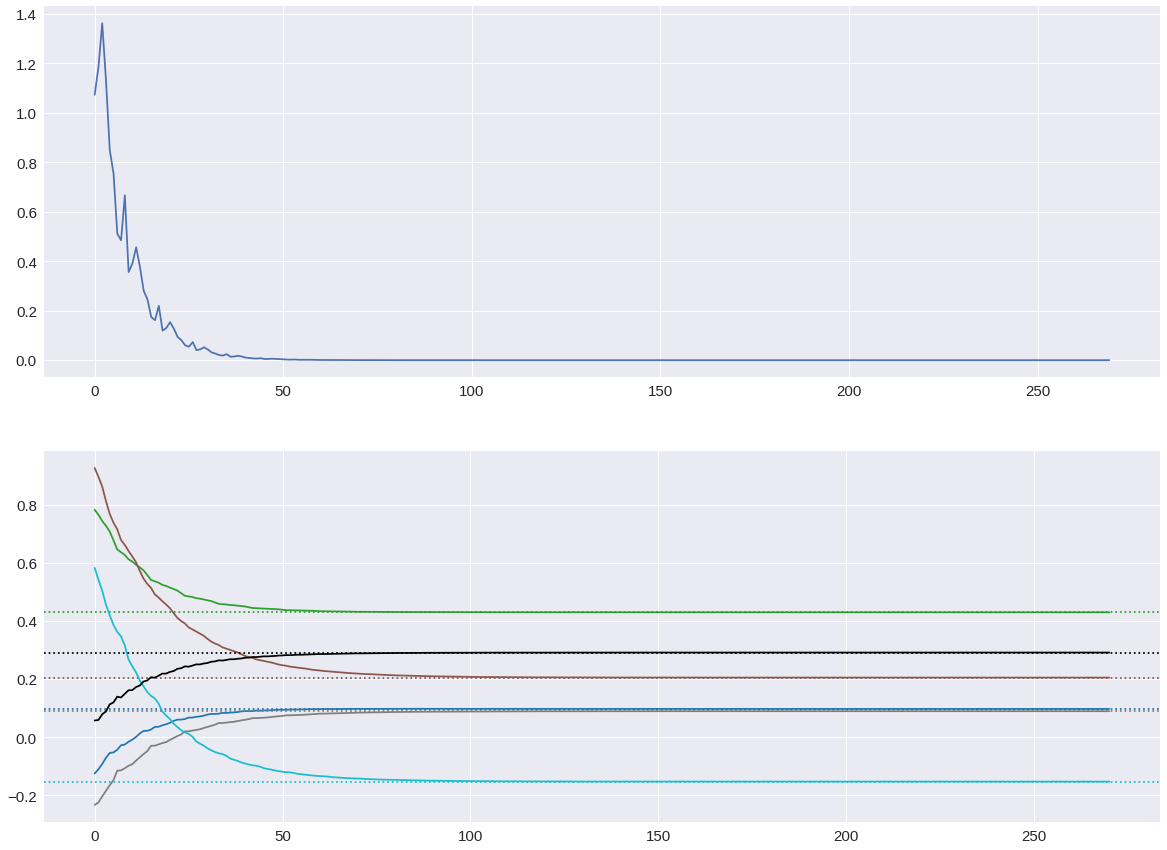

In [2]:
#Visualized results
cmap = cm.get_cmap("tab10", n_feature)
fig, axes = plt.subplots(2, 1, figsize = (20, 15))
axes[0].plot(J_track)
axes[0].tick_params(labelsize = 15)

for w_idx, (target_w, w_vec) in enumerate(zip(target_w_vec, w_vec_track)):
    axes[1].axhline(y = target_w, linestyle = ":", color = cmap(w_idx))
    axes[1].plot(w_vec, color = cmap(w_idx))
axes[1].axhline(y = target_b, linestyle = ":", color = "black")
axes[1].plot(b_track, color = "black")
axes[1].tick_params(labelsize = 15)